<a href="https://colab.research.google.com/github/joshuacalloway/dsc540groupproject/blob/main/StartingTrumpTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using NLP on Trump's Tweets

## A. Fetch 1000 of Trump's latest tweets
Here we use thetrumparchive to fetch 1000 of Trump's latest tweets.  The tweets come back as JSON in format of
<code>
{
  id: 1
  text: 'Lets win Michigan'
  isRetweet: True
  isDeleted: False
  device: iPhone
  favorites: 323,
  retweets: 2
  date: 2020-11-02
}
</code>

In [1]:
import urllib.request, json 

In [2]:
with urllib.request.urlopen("https://www.thetrumparchive.com/latest-tweets") as url:
    data = json.loads(url.read().decode())


In [15]:
# we r interested in the text for NLP
get_tweet_text = lambda tweet : tweet['text']

print(get_tweet_text(data[0])) 


I gave Maine everything that Obama/Biden took away from it. 5000 square miles, Lobster, Fishing, ended tariffs from China and E.U. and much more. Vote Trump Maine!


In [17]:

tweets = map(get_tweet_text, data)
list(tweets)

['I gave Maine everything that Obama/Biden took away from it. 5000 square miles, Lobster, Fishing, ended tariffs from China and E.U. and much more. Vote Trump Maine!',
 'Landing in Scranton, Pennsylvania!',
 'Just signed an order to establish the 1776 Commission. We will stop the radical indoctrination of our students, and restore PATRIOTIC EDUCATION to our schools!',
 'Joe Biden is bought and paid for by Big Tech, Big Media, Big Donors, and powerful special interests. They are desperate for him to win because they own him, they control him, and they know he will always do their bidding! https://t.co/gsFSghkmdM https://t.co/7zJvOFACWz',
 'The Depraved Swamp have been trying to stop me – because they know I don’t answer to THEM – I answer only to YOU. Together, we will defeat the corrupt establishment, we will DETHRONE the failed political class, we will drain the Washington Swamp &amp; we will SAVE THE AMERICAN DREAM!',
 'Biden will RAISE YOUR TAXES (Biggest increase ever!).',
 'Biden 

## B. Let's use a tweepy and TextBlob to see what common sentiment and subjectivity of each Tweet 

Two blogs that use tweepy and TextBlob can be found at 
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/
- https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082



In [19]:
# We r going to use tweepy and TextBlob for tweets

import tweepy as tw
from textblob import TextBlob

In [20]:
# First we load the tweets into a pandas DataFrame
from pandas import DataFrame

df = DataFrame(data)
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,1323346474348896256,I gave Maine everything that Obama/Biden took ...,False,False,Twitter for iPhone,26057,5392,2020-11-02T19:29:20.000Z
1,1323345318528741377,"Landing in Scranton, Pennsylvania!",False,False,Twitter for iPhone,40770,5054,2020-11-02T19:24:45.000Z
2,1323344710023471116,Just signed an order to establish the 1776 Com...,False,False,Twitter for iPhone,55375,13080,2020-11-02T19:22:20.000Z
3,1323342308922843143,"Joe Biden is bought and paid for by Big Tech, ...",False,False,Twitter for iPhone,21901,5341,2020-11-02T19:12:47.000Z
4,1323340413579726848,The Depraved Swamp have been trying to stop me...,False,False,Twitter for iPhone,43214,11336,2020-11-02T19:05:15.000Z


In [21]:
# Define some cleaning methods for the Tweet Text
# Create a function to clean the tweets
import re

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text.lower()

# Remove URLs for cleaning the tweet text
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [22]:

# Very simple, if score is negative, we mark the Polarity as negative
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [23]:
# we clean the text for each Tweet
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,1323346474348896256,i gave maine everything that obama/biden took ...,False,False,Twitter for iPhone,26057,5392,2020-11-02T19:29:20.000Z
1,1323345318528741377,"landing in scranton, pennsylvania!",False,False,Twitter for iPhone,40770,5054,2020-11-02T19:24:45.000Z
2,1323344710023471116,just signed an order to establish the 1776 com...,False,False,Twitter for iPhone,55375,13080,2020-11-02T19:22:20.000Z
3,1323342308922843143,"joe biden is bought and paid for by big tech, ...",False,False,Twitter for iPhone,21901,5341,2020-11-02T19:12:47.000Z
4,1323340413579726848,the depraved swamp have been trying to stop me...,False,False,Twitter for iPhone,43214,11336,2020-11-02T19:05:15.000Z
...,...,...,...,...,...,...,...,...
995,1316053824193339403,"join me tomorrow tonight (wednesday) in iowa, ...",False,False,Twitter for iPhone,38987,10316,2020-10-13T16:30:57.000Z
996,1316053182775275521,"join me tonight at 7:00pme in johnstown, penns...",False,False,Twitter for iPhone,39881,10776,2020-10-13T16:28:24.000Z
997,1316032322811162624,: virginia’s voter registration system reporte...,True,False,Twitter for iPhone,0,7224,2020-10-13T15:05:31.000Z
998,1316032083219935236,this is happening all over the u.s. rigged ele...,False,False,Twitter for iPhone,50504,21401,2020-10-13T15:04:33.000Z


# C. We compute Subjectivity and Polarity of Tweet using TextBlob
- subjectivity is how opinionated a tweet is ( scaled from 1 to -1 )
- polarity is whether or not the tweet is positive or negative ( scaled from 1 to -1 )

In [24]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# We eliminate words less then 3 characters long and standardize all words to lowercase
def filter_words(words):
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    return words_filtered



# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,Subjectivity,Polarity
0,1323346474348896256,i gave maine everything that obama/biden took ...,False,False,Twitter for iPhone,26057,5392,2020-11-02T19:29:20.000Z,0.500000,0.625000
1,1323345318528741377,"landing in scranton, pennsylvania!",False,False,Twitter for iPhone,40770,5054,2020-11-02T19:24:45.000Z,0.000000,0.000000
2,1323344710023471116,just signed an order to establish the 1776 com...,False,False,Twitter for iPhone,55375,13080,2020-11-02T19:22:20.000Z,0.000000,0.000000
3,1323342308922843143,"joe biden is bought and paid for by big tech, ...",False,False,Twitter for iPhone,21901,5341,2020-11-02T19:12:47.000Z,0.533929,0.200893
4,1323340413579726848,the depraved swamp have been trying to stop me...,False,False,Twitter for iPhone,43214,11336,2020-11-02T19:05:15.000Z,0.480000,-0.200000
...,...,...,...,...,...,...,...,...,...,...
995,1316053824193339403,"join me tomorrow tonight (wednesday) in iowa, ...",False,False,Twitter for iPhone,38987,10316,2020-10-13T16:30:57.000Z,0.000000,0.000000
996,1316053182775275521,"join me tonight at 7:00pme in johnstown, penns...",False,False,Twitter for iPhone,39881,10776,2020-10-13T16:28:24.000Z,0.000000,0.000000
997,1316032322811162624,: virginia’s voter registration system reporte...,True,False,Twitter for iPhone,0,7224,2020-10-13T15:05:31.000Z,0.183333,0.050000
998,1316032083219935236,this is happening all over the u.s. rigged ele...,False,False,Twitter for iPhone,50504,21401,2020-10-13T15:04:33.000Z,0.000000,0.000000


# D. For fun, we create a wordcloud of Trump's positive and negative tweets

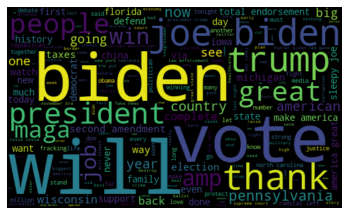

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# word cloud visualization of all Tweets
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

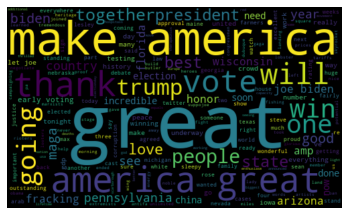

In [36]:
# word cloud visualization for positive tweets
positive_words = df[df.Polarity > 0.5]['text']

allWords = ' '.join([twts for twts in positive_words])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

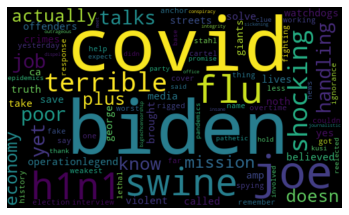

In [37]:
# word cloud visualization for positive tweets
negative_words = df[df.Polarity < -0.5]['text']

allWords = ' '.join([twts for twts in negative_words])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# D. Trying NLTK to analyze NLP on Trump's Tweets as outlined in

- http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/
- https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed

We need to c

In [74]:
def tweet_text_from_tuple(tweet):
    return tweet[0]

def tweet_sentiment_from_tuple(tweet):
    return tweet[1]

def transform_tweet(tweet):
    if tweet['Polarity'] > 0:
        return (tweet['text'], 'positive')
    else:
        return (tweet['text'], 'negative')
        

In [75]:
pos_tweets = []
neg_tweets = []
for index, row in df.iterrows():
    tweet = transform_tweet(row)
    if (tweet[1] == 'negative'):
        neg_tweets.append(tweet)
    else:
        pos_tweets.append(tweet)

len(neg_tweets)

595

In [76]:


tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = filter_words(words)
    tweets.append((words_filtered, sentiment))

In [77]:
tweets

[(['people',
   'are',
   'forgetting',
   'that',
   'sleepy',
   'joe',
   'biden',
   'and',
   'the',
   'radical',
   'left',
   'dems',
   'win,',
   'you',
   'will',
   'vey',
   'quickly',
   'lose',
   'your',
   'second',
   'amendment!'],
  'positive'),
 (['joe',
   'biden',
   'the',
   'candidate',
   'rioters,',
   'looters,',
   'arsonists,',
   'gun-grabbers,',
   'flag-burners,',
   'marxists,',
   'lobbyists,',
   'and',
   'special',
   'interests.',
   'the',
   'candidate',
   'farmers,',
   'factory',
   'workers,',
   'police',
   'officers,',
   'and',
   'hard-working,',
   'law-abiding',
   'patriots',
   'every',
   'race,',
   'religion',
   'and',
   'creed!',
   'maga'],
  'positive'),
 (['live:', 'call', 'prayer', 'text', 'vote', '88022'], 'positive'),
 (['pennsylvania:',
   'biden',
   'said',
   'that',
   'doesn’t',
   'want',
   'fracking.',
   'besides,',
   'and',
   'more',
   'importantly,',
   'his',
   'handlers',
   'won’t',
   'allow',
   'fr

In [78]:
import nltk

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

In [79]:
word_features = get_word_features(get_words_in_tweets(tweets))
word_features

dict_keys(['people', 'are', 'forgetting', 'that', 'sleepy', 'joe', 'biden', 'and', 'the', 'radical', 'left', 'dems', 'win,', 'you', 'will', 'vey', 'quickly', 'lose', 'your', 'second', 'amendment!', 'candidate', 'rioters,', 'looters,', 'arsonists,', 'gun-grabbers,', 'flag-burners,', 'marxists,', 'lobbyists,', 'special', 'interests.', 'farmers,', 'factory', 'workers,', 'police', 'officers,', 'hard-working,', 'law-abiding', 'patriots', 'every', 'race,', 'religion', 'creed!', 'maga', 'live:', 'call', 'prayer', 'text', 'vote', '88022', 'pennsylvania:', 'said', 'doesn’t', 'want', 'fracking.', 'besides,', 'more', 'importantly,', 'his', 'handlers', 'won’t', 'allow', 'would', 'end', 'pennsylvania!', 'michigan', 'was', 'great!', 'landing', 'now', 'dubuque,', 'iowa.', 'see', 'soon.', 'hispanics', 'rally', 'pres', 'trump.', 'huge', 'new', 'poll', 'from', 'abc', 'news', 'for', 'fl.', 'let’s', 'go!', 'latinosfortrump', 'under', 'leadership,', 'our', 'economy', 'growing', 'fastest', 'rate', 'ever', '

In [80]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [81]:
training_set = nltk.classify.apply_features(extract_features, tweets)

In [82]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [83]:
from nltk import ELEProbDist
def train(labeled_featuresets, estimator=ELEProbDist):
    # Create the P(label) distribution
    label_probdist = estimator(label_freqdist)
    # Create the P(fval|label, fname) distribution
    feature_probdist = {}
    return NaiveBayesClassifier(label_probdist, feature_probdist)

In [84]:
tweet = 'pennsylvania: is great!'
extract_features(tweet.split())

{'contains(people)': False,
 'contains(are)': False,
 'contains(forgetting)': False,
 'contains(that)': False,
 'contains(sleepy)': False,
 'contains(joe)': False,
 'contains(biden)': False,
 'contains(and)': False,
 'contains(the)': False,
 'contains(radical)': False,
 'contains(left)': False,
 'contains(dems)': False,
 'contains(win,)': False,
 'contains(you)': False,
 'contains(will)': False,
 'contains(vey)': False,
 'contains(quickly)': False,
 'contains(lose)': False,
 'contains(your)': False,
 'contains(second)': False,
 'contains(amendment!)': False,
 'contains(candidate)': False,
 'contains(rioters,)': False,
 'contains(looters,)': False,
 'contains(arsonists,)': False,
 'contains(gun-grabbers,)': False,
 'contains(flag-burners,)': False,
 'contains(marxists,)': False,
 'contains(lobbyists,)': False,
 'contains(special)': False,
 'contains(interests.)': False,
 'contains(farmers,)': False,
 'contains(factory)': False,
 'contains(workers,)': False,
 'contains(police)': False,
 

In [85]:
classifier.classify(extract_features(tweet.split()))

'negative'

In [86]:
classifier.classify(extract_features(filter_words(tweet_text_from_tuple(pos_tweets[5]))))

'positive'

In [40]:
classifier.classify(extract_features(filter_words(tweet_text_from_tuple(neg_tweets[5]))))

'negative'

In [29]:
pos_tweets[5]

(': Hispanics rally to Pres Trump.\n\nHuge new poll from ABC News for FL.\n\nLet’s go!\n\nLatinosForTrump ',
 'positive')

In [88]:
classifier.classify(extract_features(filter_words(pos_tweets[5][0])))

'positive'

In [36]:
classifier.classify(extract_features(filter_words(neg_tweets[5][0])))

'negative'

In [41]:
classifier.classify(extract_features(tweet_text_from_tuple(pos_tweets[5])))

'negative'

In [87]:
classifier.classify(extract_features(tweet_text_from_tuple(pos_tweets[5])))

'negative'

In [89]:
classifier.classify(extract_features(pos_tweets[5][0]))

'negative'